In [3]:
from google.colab import files

# Upload the file (this prompts you to select a file from your local system)
uploaded = files.upload()


Saving COMPANY.csv to COMPANY.csv


In [58]:
#Read the CSV file
import pandas as pd


df = pd.read_csv('COMPANY.csv')


In [59]:
df.head()


,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [6]:
df.tail()

,Startup,Product,Funding,Event,Result,OperatingState
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating
661,Zumper,zumper.com,$31.5M,Disrupt SF 2012,Finalist,Operating


In [63]:
# Check the dftypes of each attribute
print(df.dtypes)

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object


In [64]:
# Checking for null values in the attributes
print(df.isnull().sum())

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64


In [65]:
# Handling missing values in 'Product' column by filling with a placeholder text (e.g., 'Not Available')
df['Product'].fillna('Not Available', inplace=True)

In [73]:
# Assuming 'df' is your DataFrame
df.dropna(inplace=True)


In [99]:
df.loc[:, 'Funds_in_million'] = df['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))


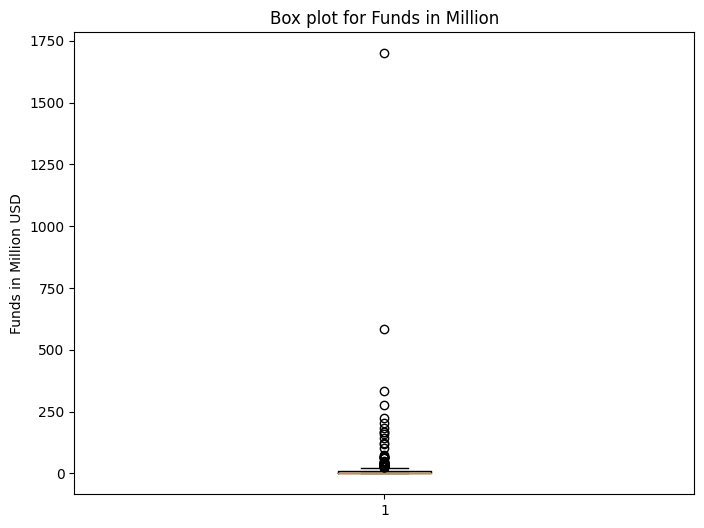

In [78]:
#Plot box plot for funds in million

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['Funds_in_million'])
plt.title('Box plot for Funds in Million')
plt.ylabel('Funds in Million USD')
plt.show()

In [79]:
#Check the number of outliers greater than the upper fence.
Q1 = df['Funds_in_million'].quantile(0.25)
Q3 = df['Funds_in_million'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR
outliers_count = df[df['Funds_in_million'] > upper_fence].shape[0]
print("Number of outliers greater than the upper fence:", outliers_count)


Number of outliers greater than the upper fence: 60


In [80]:
#Check frequency of the OperatingState feature classes
state_frequency = df['OperatingState'].value_counts()
print(state_frequency)

Operating    320
Acquired      66
Closed        58
Ipo            4
Name: OperatingState, dtype: int64


In [98]:
#Calculate percentage of winners that are still operating and percentage of contestants that are still operating

if total_winners != 0:
    percentage_winners_operating = (winners_operating / total_winners) * 100
    print("Percentage of winners still operating:", percentage_winners_operating)
else:
    print("No winners in the dfset.")

if total_contestants != 0:
    percentage_contestants_operating = (contestants_operating / total_contestants) * 100
    print("Percentage of contestants still operating:", percentage_contestants_operating)
else:
    print("No contestants in the dfset.")


Percentage of winners still operating: Operating    72.0
Acquired     28.0
Name: OperatingState, dtype: float64
Percentage of contestants still operating: Operating    68.471338
Closed       16.242038
Acquired     14.331210
Ipo           0.955414
Name: OperatingState, dtype: float64


In [97]:
#Write the null hypothesis and alternative hypothesis.
from scipy.stats import chi2_contingency

print(df['Result'].unique())

winners_operating = df[df['Result'] == 'Winner']['OperatingState'].value_counts()
contestants_operating = df[df['Result'] == 'Contestant']['OperatingState'].value_counts()

print(winners_operating)
print(contestants_operating)

if not winners_operating.empty and not contestants_operating.empty:
    contingency_table = pd.DataFrame({'Winners': winners_operating, 'Contestants': contestants_operating})

    # Perform chi-squared test for independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Check for significance
    alpha = 0.05
    if p < alpha:
        print("Reject null hypothesis: The proportion of operating companies differs between winners and contestants.")
    else:
        print("Fail to reject null hypothesis: No significant difference in the proportion of operating companies.")
else:
    print("No data available for contingency table.")


['Contestant' 'Audience choice' 'Finalist' 'Winner' 'Runner up']
Operating    18
Acquired      7
Name: OperatingState, dtype: int64
Operating    215
Closed        51
Acquired      45
Ipo            3
Name: OperatingState, dtype: int64
Fail to reject null hypothesis: No significant difference in the proportion of operating companies.


In [84]:
# Extracting year from the 'Event' column
df['Year'] = df['Event'].str.extract(r'(\d{4})')

# Select events containing 'disrupt' from 2013 onwards
disrupt_events = df[(df['Event'].str.contains('disrupt', case=False, na=False)) & (df['Year'].astype(float) >= 2013)]



In [85]:
#Make a copy of the original data frame.
copied_df = df.copy()

In [86]:
#Check frequency distribution of Result variables.
result_distribution = copied_df['Result'].value_counts()
print(result_distribution)


Contestant         314
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: Result, dtype: int64


In [94]:
#Write your hypothesis comparing the proportion of companies that are operating between winners and contestants

winners_operating = copied_df[(copied_df['Result'] == 'Winner') & (copied_df['OperatingState'] == 'Operating')].shape[0]
total_winners = copied_df[copied_df['Result'] == 'Winner'].shape[0]

contestants_operating = copied_df[(copied_df['Result'] == 'Contestant') & (copied_df['OperatingState'] == 'Operating')].shape[0]
total_contestants = copied_df[copied_df['Result'] == 'Contestant'].shape[0]

percentage_winners_operating = (winners_operating / total_winners) * 100 if total_winners != 0 else 0
percentage_contestants_operating = (contestants_operating / total_contestants) * 100 if total_contestants != 0 else 0

print(f"Percentage of winners still operating: {percentage_winners_operating:.2f}%")
print(f"Percentage of contestants still operating: {percentage_contestants_operating:.2f}%")


Percentage of winners still operating: 72.00%
Percentage of contestants still operating: 68.47%


In [93]:
#Test for significance and conclusion
from scipy.stats import chi2_contingency

observed = [[winners_operating, total_winners - winners_operating],
            [contestants_operating, total_contestants - contestants_operating]]

chi2, p, dof, expected = chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: The proportion of companies still operating differs between winners and contestants.")
else:
    print("Fail to reject null hypothesis: The proportion of companies still operating is the same between winners and contestants.")


Fail to reject null hypothesis: The proportion of companies still operating is the same between winners and contestants.


In [92]:
# Select only the Event that has ‘disrupt’ keyword from 2013 onwards
df['Event'] = df['Event'].astype(str)

disrupt_events_2013_onwards = df[df['Event'].str.contains('disrupt', case=False) & (df['Event'].str.extract(r'(\d{4})', expand=False).astype(float) >= 2013)]

print(disrupt_events_2013_onwards)


        Startup         Product  Funding                Event  \
1          3DLT        3dlt.com    $630K     Disrupt NYC 2013   
3    3Dprintler  3dprintler.com      $1M      Disrupt NY 2016   
13     Agrilyst    agrilyst.com      $1M      Disrupt SF 2015   
14        Aiden        aiden.ai    $750K  Disrupt London 2016   
16      Aircall      aircall.io   $11.6M      Disrupt SF 2015   
..          ...             ...      ...                  ...   
641    Workspot    workspot.com   $15.8M     Disrupt NYC 2013   
642       Xendo       xendo.com     $28K      Disrupt SF 2014   
646  YayPay Inc      yaypay.com    $900K  Disrupt London 2015   
656    Zenefits    zenefits.com  $583.6M     Disrupt NYC 2013   
660        Zula     zulaapp.com    $3.4M      Disrupt SF 2013   

              Result OperatingState  Funds_in_million  Year  
1         Contestant         Closed             0.630  2013  
3    Audience choice      Operating             1.000  2016  
13            Winner      Operati